### Borrador del cuaderno de trabajo de incremento de frecuencia sin datos de pozos y con datos de pozos

Notas: 

1) He tenido problemas al correr el script y construir el archivo _Sconstruct_ de manera ordenada. Me queda como tarea documentar y resolver este problema. 

2) Documentar cada una las estapas. Esta libreta de trabajo es de incremento de frecuencia por multiplicador de fase.

In [1]:
from m8r import view

In [2]:
#ls

In [3]:
%%file a.scons

entrada = 'penobscot_sub.sgy'

Flow('sismica_seudo2d', entrada, 
     '''segyread tfile=tfile.rsf bfile=bfile hfile=hfile verb=y endian=y''')

Flow('sismica_cubo', 'sismica_seudo2d', 
     '''intbin inv=n head=tfile.rsf xk=xline yk=iline | put label1=Tiempo label3=inline label2=xline''')

Flow('inline1300', 'sismica_cubo', 
                '''window min1=2 max1=3 min3=1300 n3=1''')

Flow('entrada-sobre', 'inline1300', 
            '''sinc n1=502 d1=0.002 o1=2''')

Flow('cuad', 'entrada-sobre',
            '''envelope hilb=y order=100''')

Flow('envol', None,
                '''math x=entrada-sobre.rsf y=cuad.rsf output="sqrt(x^2+y^2)" ''')

Flow('fase_inst', None,
                '''math x=entrada-sobre.rsf y=cuad.rsf output="atan(y/x)" ''')

Overwriting a.scons


In [4]:
%%file b.scons

for i in range (2, 6):
    Flow('mult_%d' %i, None,
             '''math amp=envol.rsf phi=fase_inst.rsf output="amp*cos(%i*phi)" ''' %i)
        
Flow('suma-n1n3', None,
         '''math a=entrada-sobre.rsf b=mult_3.rsf output="a+b" ''')

Flow('suma-n1n3-sub', 'suma-n1n3',
                 '''sinc n1=251 d1=0.004 o1=2''')

Overwriting b.scons


In [5]:
%%file c.scons

Plot('original', 'inline1300',
                            'byte gainpanel=all | grey title="(a) Datos Originales" ' )
        
Plot('resultado1', 'suma-n1n3-sub', 
                             'byte gainpanel=all | grey title="(b) Multiplicador N1+N3" ' )

Plot('resultado2', 'suma-n1n3-sub',
                             'pow pow1=2 | grey title="(c) Multiplicador N1+N3 Ganancia de potencia" ' )

Result('prueba1', 'original resultado1 resultado2', 'SideBySideIso')

Overwriting c.scons


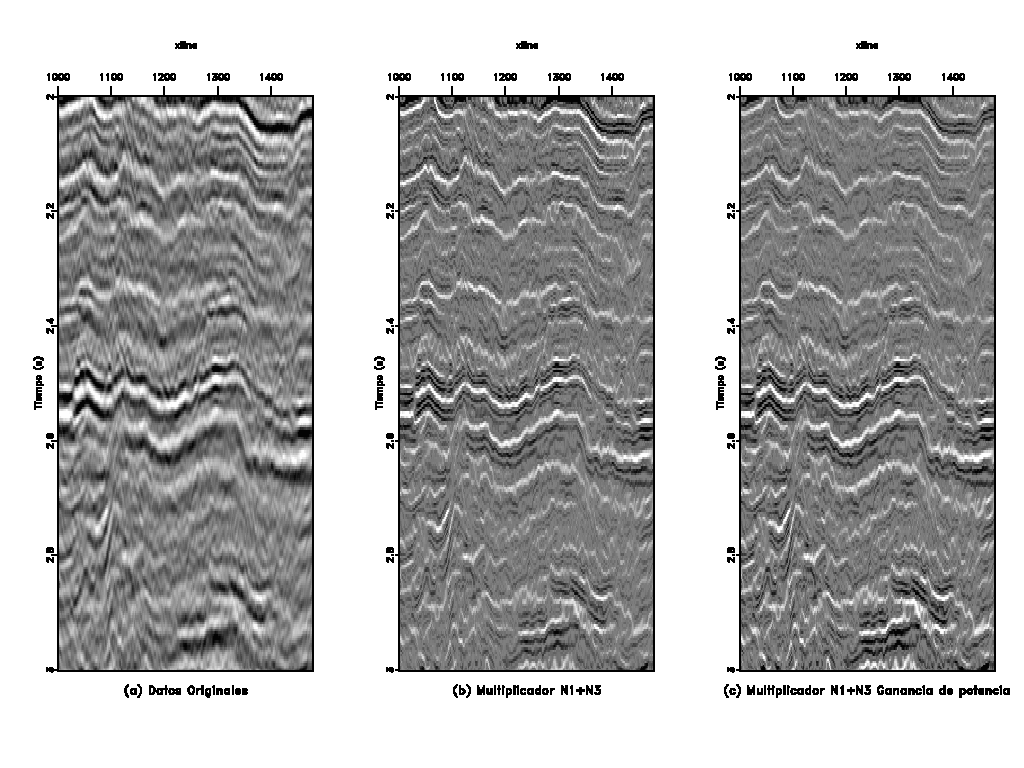

In [6]:
view('prueba1')

In [11]:
%%file c.scons

Result('original', 'inline1300',
                            'byte gainpanel=all |grey title="inline 1300"  color=G ' )


Result('resultado1', 'suma-n1n3-sub',
                            'byte gainpanel=all |grey title="Suma N1 + N3"  color=G ' )
        

Overwriting c.scons


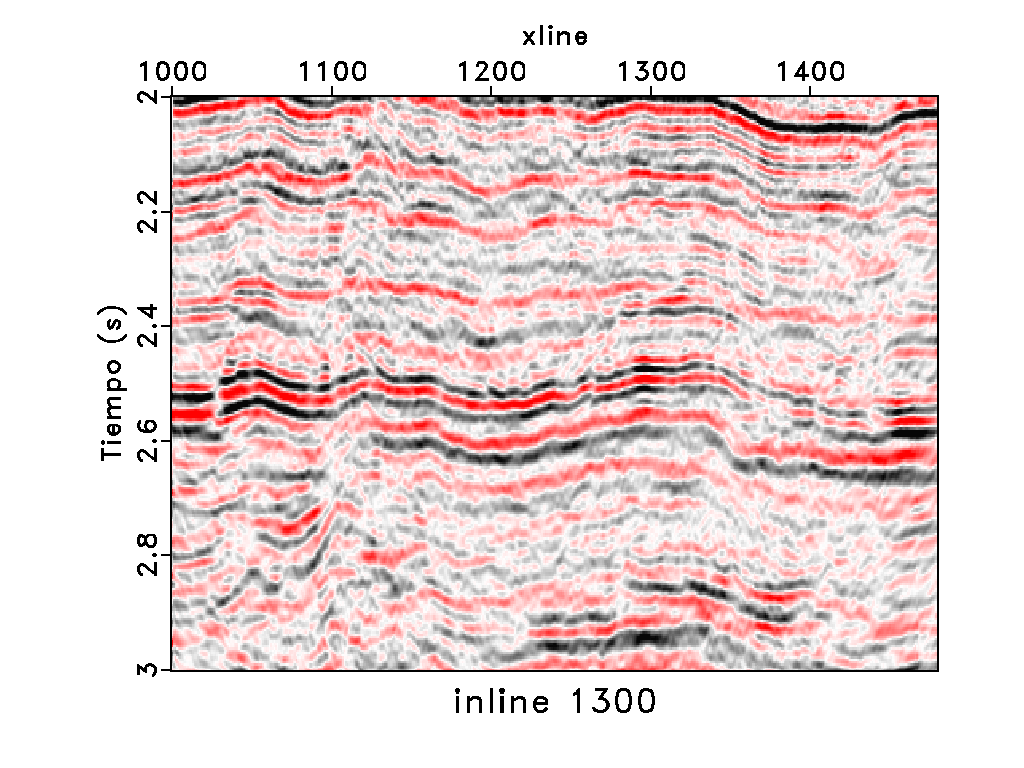

In [12]:
view('original')

In [13]:
view('resultado1')

No IPython Image support


In [14]:
%%file data.scons

input = 'penobscot_sub.sgy'

Flow('sismica_seudo2d', input, 'segyread tfile=tfile.rsf bfile=bfile hfile=hfile verb=y endian=y')

Flow('sismica_cubo', 'sismica_seudo2d', 'intbin inv=n head=tfile.rsf xk=xline yk=iline | put label3=line label2=traza')


Writing data.scons


In [15]:
%%file display.scons

Result('sismica_cubo', 'byte gainpanel=all | grey3 frame1=0 frame2=1 frame3=0 title="Penobscot" flat=n')


Writing display.scons


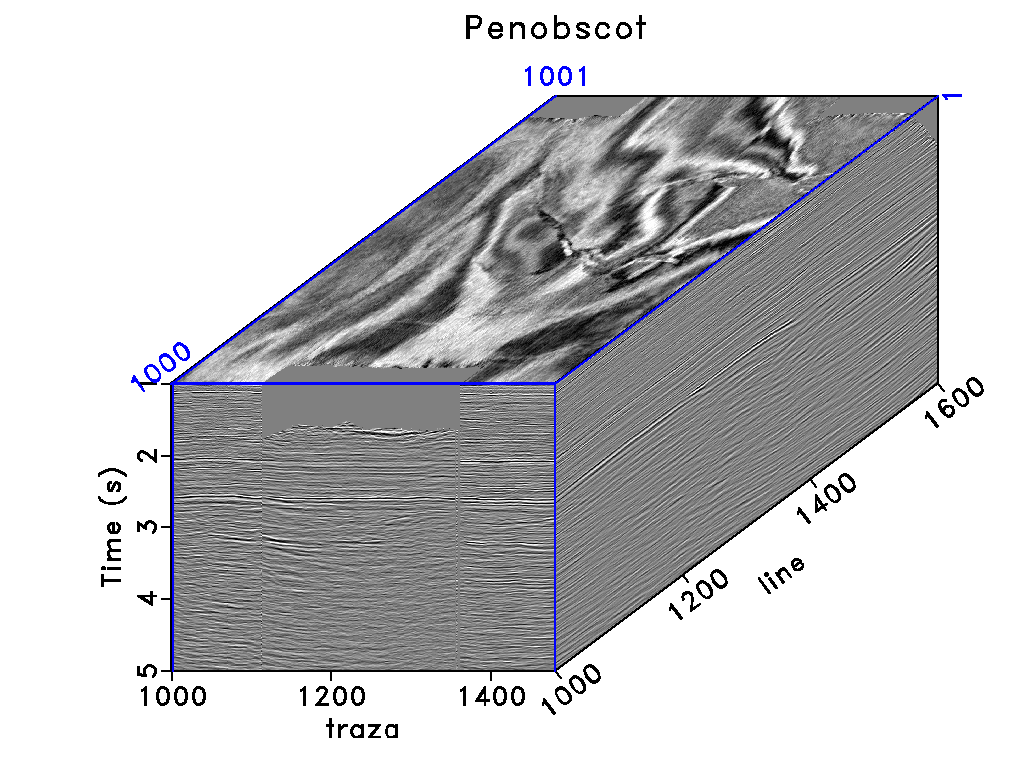

In [16]:
view('sismica_cubo')

In [27]:
#!scons -cQ